In [12]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지

In [16]:

# CSV 파일 읽기
df = pd.read_csv('C:/Data/NIH_Chest_X-rays/BBox_List_2017.csv', header=None, 
                 names=['filename', 'class', 'x', 'y', 'width', 'height'])

# 기본 정보 출력
print("데이터셋 기본 정보:")
print(f"총 데이터 수: {len(df)}")


데이터셋 기본 정보:
총 데이터 수: 985


In [15]:
import os

# bbox_list_img 폴더 경로
bbox_img_dir = r'C:\Data\NIH_Chest_X-rays\Chest_data_analysis\bbox_list_img'

# 폴더 내 이미지 파일 리스트 가져오기
img_files = [f for f in os.listdir(bbox_img_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

# 이미지 개수 출력
print(f'bbox_list_img 폴더 내 이미지 개수: {len(img_files)}')


bbox_list_img 폴더 내 이미지 개수: 880


In [9]:
import pandas as pd

# Load the CSV to check for duplicated image entries
csv_path = "C:/Data/NIH_Chest_X-rays/BBox_List_2017.csv"
df = pd.read_csv(csv_path)

# Count how many times each image index appears
duplicated_info = df['Image Index'].value_counts()
duplicated_info = duplicated_info[duplicated_info > 1].reset_index()
duplicated_info.columns = ['Image Index', 'Duplicate Count']

duplicated_info


,Image Index,Duplicate Count
0,00010277_000.png,4
1,00018253_059.png,3
2,00005066_030.png,3
3,00008814_010.png,3
4,00021703_001.png,3
...,...,...
88,00026196_001.png,2
89,00026221_001.png,2
90,00017243_010.png,2
91,00030162_029.png,2


In [10]:
# 필터링된 중복 이미지 목록에 해당하는 원본 데이터의 하위셋 추출
duplicated_image_df = df[df['Image Index'].isin(duplicated_info['Image Index'])]

# 중복 이미지와 특성 정보를 CSV로 저장
output_path = "C:/Data/NIH_Chest_X-rays/Chest_data_analysis/duplicated_images_with_bbox.csv"
duplicated_image_df.to_csv(output_path, index=False)

output_path


'C:/Data/NIH_Chest_X-rays/duplicated_images_with_bbox.csv'

In [19]:
# 새로 업로드된 CSV 로드
df_bbox = pd.read_csv('C:/Data/NIH_Chest_X-rays/BBox_List_2017.csv')

# 컬럼명 변경
df_bbox_renamed = df_bbox.rename(columns={
    'Bbox [x': 'x',
    'h]': 'h'
})
df_bbox_renamed = df_bbox_renamed.loc[:, ~df_bbox_renamed.columns.str.contains('^Unnamed')]
# 저장
renamed_path = "C:/Data/NIH_Chest_X-rays/Chest_data_analysis/BBox_List_2017_renamed.csv"
df_bbox_renamed.to_csv(renamed_path, index=False)

renamed_path


'C:/Data/NIH_Chest_X-rays/Chest_data_analysis/BBox_List_2017_renamed.csv'

In [18]:
# 업로드된 중복 이미지 CSV 파일 로드
df_dup_bbox = pd.read_csv('C:/Data/NIH_Chest_X-rays/Chest_data_analysis/duplicated_images_with_bbox.csv')

# 컬럼명 변경 및 Unnamed 컬럼 제거
df_dup_bbox_cleaned = df_dup_bbox.rename(columns={
    'Bbox [x': 'x',
    'h]': 'h'
})

# Unnamed 열 제거
df_dup_bbox_cleaned = df_dup_bbox_cleaned.loc[:, ~df_dup_bbox_cleaned.columns.str.contains('^Unnamed')]

# 저장
output_path = "C:/Data/NIH_Chest_X-rays/Chest_data_analysis/duplicated_images_with_bbox_cleaned.csv"
df_dup_bbox_cleaned.to_csv(output_path, index=False)

output_path


'C:/Data/NIH_Chest_X-rays/Chest_data_analysis/duplicated_images_with_bbox_cleaned.csv'

In [22]:
# 중복 이미지 정제본 로드
df = pd.read_csv('C:/Data/NIH_Chest_X-rays/Chest_data_analysis/duplicated_images_with_bbox_cleaned.csv')

# 1. 어떤 Finding Label이 있는지 확인
label_counts = df['Finding Label'].value_counts().reset_index()
label_counts.columns = ['Finding Label', 'Count']

# 2. 이미지 별 중복 상태 분석
grouped = df.groupby('Image Index')

# 중복 이미지 리스트 생성 (2개 이상인 경우만)
dup_analysis = []

for img_id, group in grouped:
    if len(group) > 1:
        labels = group['Finding Label'].unique().tolist()
        bbox_count = len(group)
        dup_analysis.append({
            'Image Index': img_id,
            'Num of ROIs': bbox_count,
            'Finding Labels': labels
        })

df_dup_analysis = pd.DataFrame(dup_analysis)

df_dup_analysis

,Image Index,Num of ROIs,Finding Labels
0,00000732_005.png,2,"[Cardiomegaly, Pneumothorax]"
1,00000830_000.png,2,"[Atelectasis, Mass]"
2,00001836_082.png,2,"[Atelectasis, Mass]"
3,00002106_000.png,2,"[Mass, Pneumothorax]"
4,00003440_000.png,2,"[Atelectasis, Mass]"
...,...,...,...
88,00029808_003.png,2,"[Cardiomegaly, Pneumonia]"
89,00029861_013.png,2,"[Infiltrate, Pneumonia]"
90,00030162_029.png,2,"[Nodule, Pneumothorax]"
91,00030408_013.png,2,"[Effusion, Infiltrate]"


발견된 Finding Labels:
- Atelectasis
- Cardiomegaly
- Effusion
- Infiltrate
- Mass
- Nodule
- Pneumonia
- Pneumothorax

Finding Label별 개수:
Finding Label
Effusion        51
Infiltrate      44
Atelectasis     31
Pneumonia       23
Mass            22
Pneumothorax    12
Cardiomegaly    11
Nodule           3
Name: count, dtype: int64


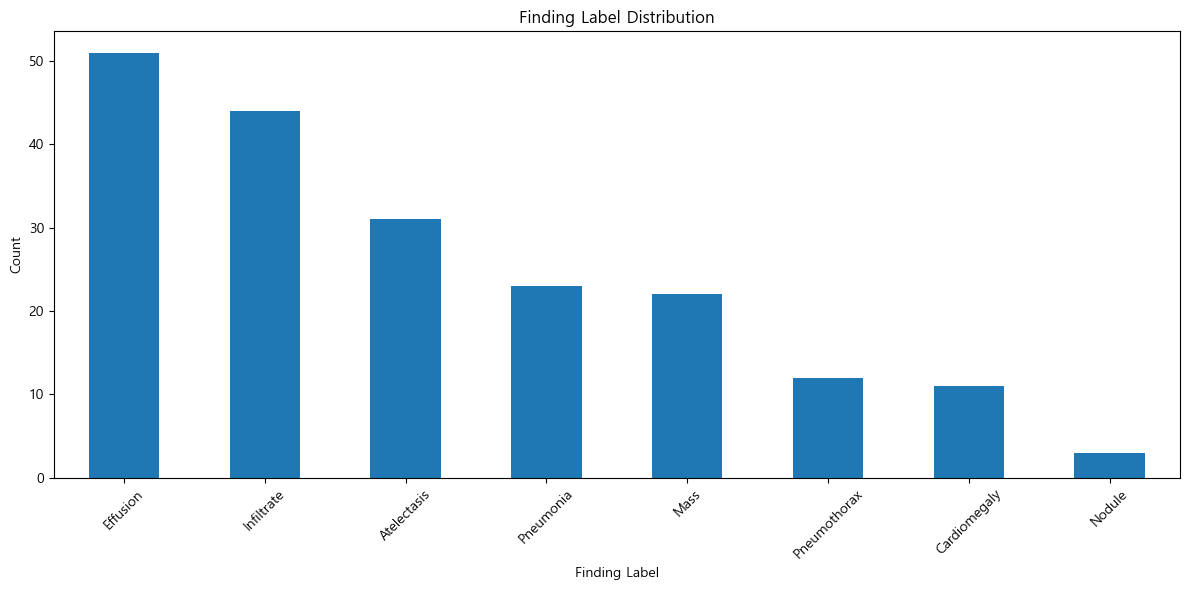

In [23]:
df = pd.read_csv('C:/Data/NIH_Chest_X-rays/Chest_data_analysis/duplicated_images_with_bbox_cleaned.csv')
# Finding Label 분석
finding_labels = df['Finding Label'].unique()
print("발견된 Finding Labels:")
for label in finding_labels:
    print(f"- {label}")

# Finding Label별 개수 분석
label_counts = df['Finding Label'].value_counts()
print("\nFinding Label별 개수:")
print(label_counts)

# Finding Label 분포 시각화
plt.figure(figsize=(12, 6))
label_counts.plot(kind='bar')
plt.title('Finding Label Distribution')
plt.xlabel('Finding Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


| Finding Label    | 설명                                                                           |
| ---------------- | ---------------------------------------------------------------------------- |
| **Effusion**     | 흉막삼출(pleural effusion). 폐와 흉벽 사이에 액체가 비정상적으로 고이는 현상입니다. 심부전, 감염 등에 의해 발생합니다. |
| **Infiltrate**   | 폐 실질에 염증이나 감염 물질이 침윤된 상태. 일반적으로 폐렴과 관련된 소견으로 해석됩니다.                          |
| **Atelectasis**  | 폐가 완전히 또는 부분적으로 허탈(무기폐)된 상태. 공기가 빠져나가며 폐가 펴지지 않음.                            |
| **Pneumonia**    | 폐렴. 폐의 감염으로 인해 공기 공간에 고름이나 체액이 차는 질환입니다.                                     |
| **Mass**         | 덩어리 혹은 종괴. 암일 가능성이 있는 큰 병변(>3cm)을 말합니다.                                      |
| **Pneumothorax** | 기흉. 폐와 흉벽 사이에 공기가 차서 폐가 눌리는 상태입니다. 갑작스러운 호흡 곤란을 유발할 수 있습니다.                  |
| **Cardiomegaly** | 심장비대. X-ray에서 심장의 크기가 비정상적으로 커 보이는 상태를 말합니다. 고혈압이나 심장질환 등과 관련됩니다.            |
| **Nodule**       | 결절. 작은 고형 병변(<3cm). 종양, 감염 등 여러 원인 가능성이 있으며 추적 관찰이 필요합니다.                    |


In [24]:
import pandas as pd

# 중복 바운딩 박스 데이터 로드
df = pd.read_csv('C:/Data/NIH_Chest_X-rays/Chest_data_analysis/duplicated_images_with_bbox_cleaned.csv')

# 이미지별로 중복된 항목을 그룹화
grouped = df.groupby('Image Index')

# 첫 번째 중복 이미지 선택
sample_img_id, sample_group = next((img_id, group) for img_id, group in grouped if len(group) > 1)

# 정보 확인용 반환
sample_img_id, sample_group[['Finding Label', 'x', 'y', 'w', 'h']]


('00000732_005.png',
     Finding Label           x           y           w           h
 27   Cardiomegaly  427.932203  464.000000  412.203390  344.949153
 183  Pneumothorax  613.831111  110.686823  172.942222  103.537778)

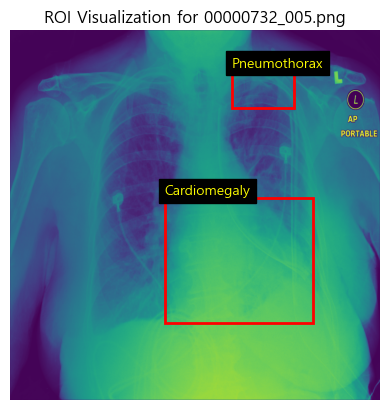

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
from PIL import Image

# 예시 이미지 경로 설정 (사용자가 실제로 갖고 있는 이미지 경로로 수정 가능)
# 예시로 로컬 경로 가정: ./images_001/images/00000732_005.png
img_path = os.path.join("C:/Data/NIH_Chest_X-rays/Chest_data_analysis/bbox_list_img", sample_img_id)

# 이미지 존재 여부 확인
if not os.path.exists(img_path):
    sample_img_exists = False
    img_path = None
else:
    sample_img_exists = True
    image = Image.open(img_path)

# 시각화 진행
if sample_img_exists:
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # 바운딩 박스 추가
    for _, row in sample_group.iterrows():
        rect = patches.Rectangle(
            (row['x'], row['y']), row['w'], row['h'],
            linewidth=2, edgecolor='red', facecolor='none'
        )
        ax.add_patch(rect)
        ax.text(row['x'], row['y'] - 10, row['Finding Label'], color='yellow', fontsize=10, backgroundcolor='black')

    plt.axis('off')
    plt.title(f"ROI Visualization for {sample_img_id}")
    plt.show()
else:
    sample_img_id, "이미지 파일이 현재 경로에 존재하지 않습니다. 이미지 경로를 지정해 주세요."


In [28]:
# 중복된 이미지들의 ID 목록 추출
duplicated_image_ids = [img_id for img_id, group in grouped if len(group) > 1]

# 상위 5개 이미지 ID 및 해당 ROI 수, 라벨 확인
sample_info = []
for img_id in duplicated_image_ids[:5]:
    group = grouped.get_group(img_id)
    sample_info.append({
        'Image Index': img_id,
        'Num of ROIs': len(group),
        'Finding Labels': group['Finding Label'].unique().tolist()
    })

df_sample_info = pd.DataFrame(sample_info)

df_sample_info

,Image Index,Num of ROIs,Finding Labels
0,00000732_005.png,2,"[Cardiomegaly, Pneumothorax]"
1,00000830_000.png,2,"[Atelectasis, Mass]"
2,00001836_082.png,2,"[Atelectasis, Mass]"
3,00002106_000.png,2,"[Mass, Pneumothorax]"
4,00003440_000.png,2,"[Atelectasis, Mass]"


In [29]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os

# 중복 이미지 그룹 전체에서 시각화할 수 있는 샘플 5개만 선택
visualization_results = []
base_path = r"C:/Data/NIH_Chest_X-rays/Chest_data_analysis/bbox_list_img"
output_dir = r"C:/Data/NIH_Chest_X-rays/Chest_data_analysis/annotated_samples"
os.makedirs(output_dir, exist_ok=True)

# 상위 5개 중복 이미지 자동 시각화 및 저장
for img_id, group in list(grouped)[0:5]:
    if len(group) < 2:
        continue

    img_path = os.path.join(base_path, img_id)
    if not os.path.exists(img_path):
        visualization_results.append((img_id, False))
        continue

    image = Image.open(img_path)
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(image)

    for _, row in group.iterrows():
        rect = patches.Rectangle(
            (row['x'], row['y']), row['w'], row['h'],
            linewidth=2, edgecolor='red', facecolor='none'
        )
        ax.add_patch(rect)
        ax.text(row['x'], row['y'] - 10, row['Finding Label'], color='yellow', fontsize=10, backgroundcolor='black')

    ax.axis('off')
    ax.set_title(f"{img_id} ROI")

    save_path = os.path.join(output_dir, f"annotated_{img_id}")
    plt.savefig(save_path, bbox_inches='tight')
    plt.close()
    visualization_results.append((img_id, True))

# 결과 요약
visualization_results


[('00000732_005.png', True),
 ('00000830_000.png', True),
 ('00001836_082.png', True),
 ('00002106_000.png', True),
 ('00003440_000.png', True)]

In [38]:
# Cardiomegaly 레이블이 있는 이미지들 추출
cardiomegaly_images = []
base_path = r"C:/Data/NIH_Chest_X-rays/Chest_data_analysis/bbox_list_img"

# BBox_List_2017_renamed.csv 파일에서 Cardiomegaly 레이블이 있는 이미지 ID 추출
with open('BBox_List_2017_renamed.csv', 'r') as f:
    for line in f:
        parts = line.strip().split(',')
        if len(parts) >= 2 and parts[1] == 'Cardiomegaly':
            img_id = parts[0]
            img_path = os.path.join(base_path, img_id)
            if os.path.exists(img_path):
                cardiomegaly_images.append(img_id)

print(f"총 {len(cardiomegaly_images)}개의 Cardiomegaly 이미지를 찾았습니다.")
print("\n처음 5개 이미지 ID:")
for img_id in cardiomegaly_images[:5]:
    print(img_id)


총 146개의 Cardiomegaly 이미지를 찾았습니다.

처음 5개 이미지 ID:
00005066_030.png
00009608_024.png
00000661_000.png
00019018_007.png
00000211_041.png


In [3]:
# 상위 4개 Cardiomegaly 이미지만 추출
selected_images = cardiomegaly_images[:4]

plt.figure(figsize=(20, 5))  # 가로로 넓게
cols = 4
rows = 1

for idx, img_id in enumerate(selected_images):
    img_path = os.path.join(base_path, img_id)
    image = Image.open(img_path)
    
    plt.subplot(rows, cols, idx + 1)
    plt.imshow(image,cmap='gray')
    plt.axis('off')
    plt.title(img_id, fontsize=10)

plt.tight_layout()
plt.show()

# BBox 정보 출력
print("\n선택된 Cardiomegaly 이미지의 BBox 정보:")
for img_id in selected_images:
    bbox_info = df[df['Image Index'] == img_id]
    print(f"\n{img_id}:")
    print(bbox_info[['Finding Label', 'x', 'y', 'w', 'h']])


NameError: name 'cardiomegaly_images' is not defined

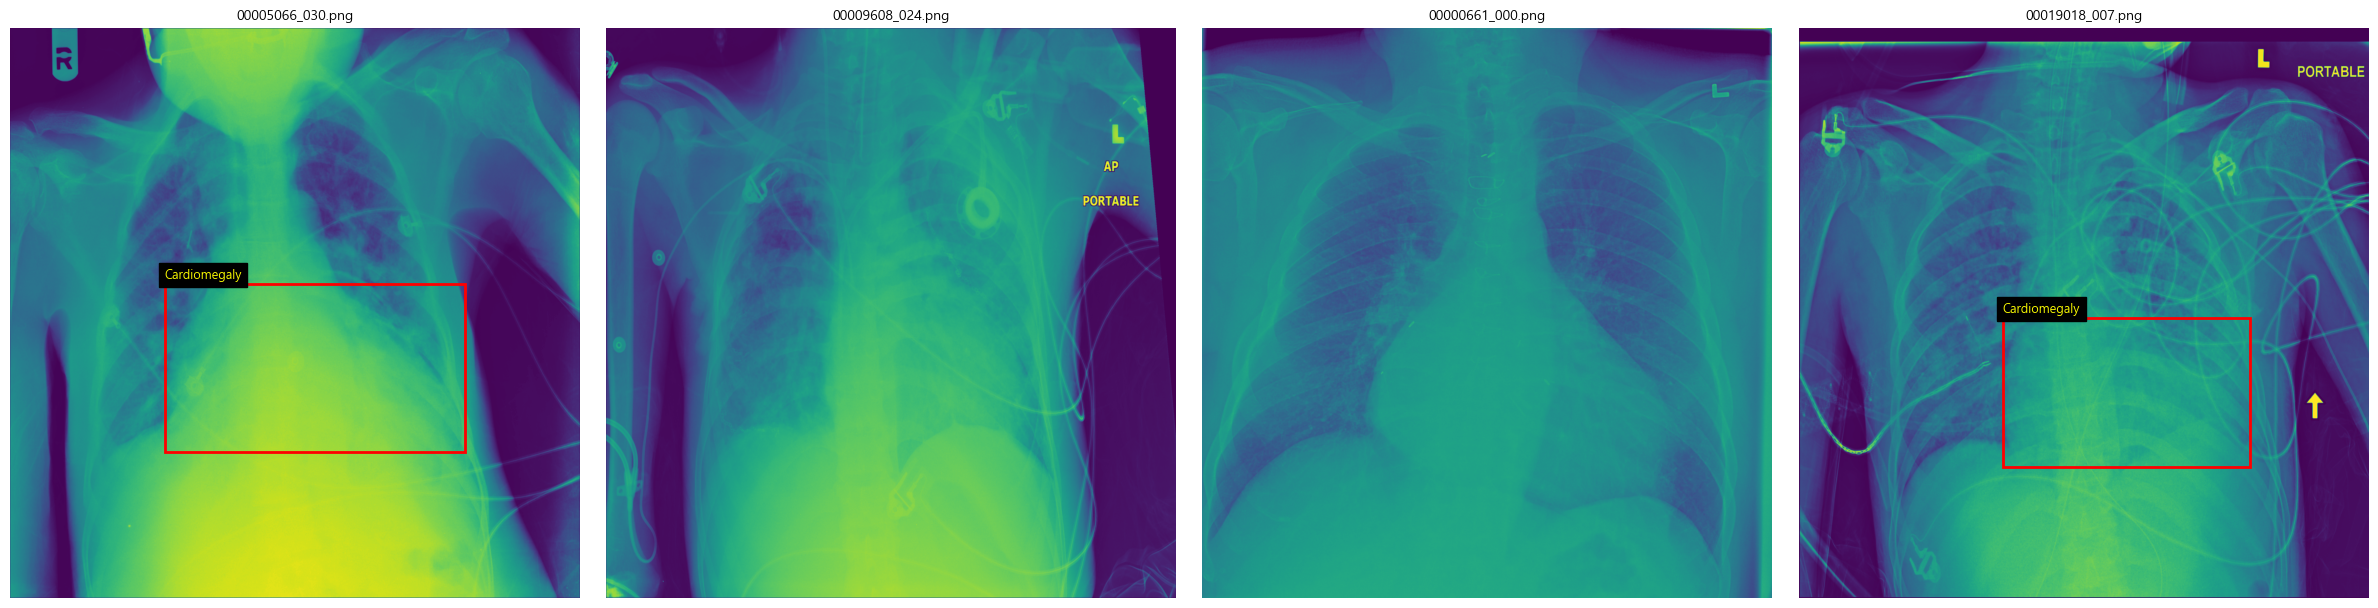

In [40]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os

# 상위 4개 Cardiomegaly 이미지
selected_images = cardiomegaly_images[:4]

plt.figure(figsize=(24, 6))  # 가로로 넓게 (6~7인치 per 이미지 기준)
cols = 4
rows = 1

for idx, img_id in enumerate(selected_images):
    img_path = os.path.join(base_path, img_id)
    image = Image.open(img_path)

    ax = plt.subplot(rows, cols, idx + 1)
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(img_id, fontsize=10)

    # 바운딩 박스 그리기
    bbox_rows = df[df['Image Index'] == img_id]
    for _, row in bbox_rows.iterrows():
        if row['Finding Label'] == 'Cardiomegaly':  # Cardiomegaly에 해당하는 ROI만 표시
            rect = patches.Rectangle(
                (row['x'], row['y']), row['w'], row['h'],
                linewidth=2, edgecolor='red', facecolor='none'
            )
            ax.add_patch(rect)
            ax.text(row['x'], row['y'] - 10, row['Finding Label'],
                    color='yellow', fontsize=9, backgroundcolor='black')

plt.tight_layout()
plt.show()
